## <center>Intro to Python for Data Science with DC OpenData</center>

![dc flag](./images/4994-004-096A5339.jpg)

<small>This notebook was prepared by [Nicole Donnelly](mailto:nicole.donnelly@dc.gov) for the DC area regional Women in Data Science Conference [(DCMDVAWiDSRegional)](https://sites.google.com/view/dcmdvawidsregional/agenda?authuser=0) on March 5,2018 and presented as a one hour workshop.</small>

### Introduction
As cities embrace the [open data](https://en.wikipedia.org/wiki/Open_data) movement (you can find links to datasets for 85 cities [here](https://www.forbes.com/sites/metabrown/2017/06/30/quick-links-to-municipal-open-data-portals-for-85-us-cities/#290b91072290)), data scientist have an ever expanding population of data available to analyze and incorporate into other projects. As with any data source, unless you are designing and collecting it yourself, you will likely need to do some data wrangling before moving on to exploratory data analysis (EDA) and machine learning. 

During the course of this workshop, we will look at using [Python](https://www.python.org/) to wrangle [open data available from the Government of the District of Columbia](http://opendata.dc.gov/) in preparation for machine learning (this workshop will not cover machine learning). We will also look at some initial EDA once we build a data set we want to use.

### Overview
If you do not have particular project in mind, I encourage you to [browse through the available data sets](http://opendata.dc.gov/datasets) (951 as of the time this workshop was created). We are going to start today with the [Computer Assisted Mass Appraisal - Condominium](http://opendata.dc.gov/datasets/computer-assisted-mass-appraisal-condominium) data. There is a lot that can be done with this data, particularly in conjunction with other data available from DC ([tax data](http://opendata.dc.gov/datasets/integrated-tax-system-public-extract), [crime data](http://opendata.dc.gov/datasets?q=crime), [construction data](http://opendata.dc.gov/datasets?q=construction), or [city service requests](http://opendata.dc.gov/datasets?q=311) for example) or other sources like the [United States Census Bureau](https://www.census.gov/data.html).

Buying a house in DC can be a daunting task. Inventory was being describe in November 2017 as ["dismally low"](https://www.washingtonpost.com/news/where-we-live/wp/2017/11/14/buyers-are-gaining-more-leverage-in-the-hot-d-c-area-housing-market/?utm_term=.b1aa57960214). But maybe armed with some appraisal data and machine learning, we can understand condominium values a little better. For example, maybe we could create a simple application to determine appraisal value, similar to [this example](https://github.com/georgetown-analytics/machine-learning/blob/master/examples/bbengfort/home%20sales/home_sales.ipynb) which uses housing sales data.

### Data

Here is [some information](https://www.arcgis.com/sharing/rest/content/items/d6c70978daa8461992658b69dccb3dbf/info/metadata/metadata.xml?format=default&output=html) available to us about the data.

**Abstract**: Computer Assisted Mass Appraisal (CAMA) database. The dataset contains attribution on housing characteristics for commercial properties, and was created as part of the DC Geographic Information System (DC GIS) for the D.C. Office of the Chief Technology Officer (OCTO) and participating D.C. government agencies. All DC GIS data is stored and exported in Maryland State Plane coordinates NAD 83 meters. 

METADATA CONTENT IS IN PROCESS OF VALIDATION AND SUBJECT TO CHANGE.

**Purpose**: This data is used for the planning and management of Washington, D.C. by local government agencies.

**Supplemental Information**: Most lots have one building in the cama file, assigned BLDG_NUM of one in the table. For parcels where multiple buildings exist, the primary building (such as the main residence) is assigned BLDG_NUM = 1. The other buildings or structures have BLDG_NUM values in random sequential order. After the primary structure, there is no way to associate BLDG_NUM > 2 records with any particular structure on the lot.



There is also some attribute information available. Some of it has been copied here. Not all of it is overly descriptive. 


***Entity and Attribute Information***:


**Attribute Label**: SALEDATE

**Attribute**:


**Attribute Label**: Sale_Num

**Attribute Definition**: sale number


**Attribute Label**: EYB

**Attribute Definition:** The calculated or apparent year, that an improvement was built that is most often more recent than actual year built.


**Attribute Label**: Shape

**Attribute Definition**: Feature geometry.


**Attribute Label**: OWNERNAME

**Attribute Definition**: property owner name


**Attribute Label**: SSL

**Attribute Definition**: square suffix and lot


**Attribute Label**: Extwall_D

**Attribute Definition**: exterior wall description


**Attribute Label**: PRICE

**Attribute**:


**Attribute Label**: Yr_Rmdl

**Attribute Definition**: year structure was remodeled


**Attribute Label**: Saledate

**Attribute Definition**: date of last sale


**Attribute Label**: AYB

**Attribute Definition**: The earliest time the main portion of the building was built. It is not affected by subsequent construction.


**Attribute Label**: Price

**Attribute Definition**: price of last sale


**Attribute Label**: GBA

**Attribute Definition**: gross building area in square feet


### Tools

A popular package for working with data in python is [pandas](https://pandas.pydata.org/pandas-docs/stable/).

From the above link:

""**pandas** is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, **real world** data analysis in Python. Additionally, it has the broader goal of becoming **the most powerful and flexible open source data analysis / manipulation tool available in any language**. It is already well on its way toward this goal.

pandas is well suited for many different kinds of data:

* Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet
* Ordered and unordered (not necessarily fixed-frequency) time series data.
* Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels
* Any other form of observational / statistical data sets. The data actually need not be labeled at all to be placed into a pandas data structure""

We will also use (Seaborn)[https://seaborn.pydata.org/] which is a visualization package built on (matplotlib)[https://matplotlib.org/], a 2D plotting library in python. 



In [53]:
import os
import urllib
import openpyxl

import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_columns = 35
%matplotlib inline

In [3]:
DATA_DIR = "./data"
cama_url = "https://opendata.arcgis.com/datasets/d6c70978daa8461992658b69dccb3dbf_24.csv"
cama_file = os.path.join(DATA_DIR, "cama-condo.csv")

In [4]:
def get_data(dname, furl, fname):
    if not os.path.exists(dname):
        print("making directory")
        os.makedirs(dname)
    else:
        print("directory exists")
    if not os.path.isfile(fname):
        print("downloading file")
        urllib.request.urlretrieve(furl, fname)
    else:
        print("file exists")

In [5]:
get_data(DATA_DIR, cama_url, cama_file)

directory exists
file exists


In [6]:
df = pd.read_csv(cama_file)

In [7]:
df.head()

,OBJECTID,SSL,BLDG_NUM,CMPLX_NUM,AYB,YR_RMDL,EYB,ROOMS,BEDRM,BATHRM,HF_BATHRM,HEAT,HEAT_D,AC,FIREPLACES,SALEDATE,PRICE,QUALIFIED,SALE_NUM,LIVING_GBA,USECODE,LANDAREA,GIS_LAST_MOD_DTTM
0,3001,5763 2009,1,1481,1965,NaN,2002,4.0,2.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2007-06-11T00:00:00.000Z,145000.0,Q,1,715,16,1185,2018-02-25T18:02:24.000Z
1,3002,5763 2010,1,1481,1965,NaN,2002,2.0,0.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2015-09-28T00:00:00.000Z,0.0,U,3,404,16,593,2018-02-25T18:02:24.000Z
2,3003,5763 2011,1,1481,1965,NaN,2002,4.0,2.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2005-08-16T00:00:00.000Z,126000.0,Q,1,688,16,988,2018-02-25T18:02:24.000Z
3,3004,5763 2012,1,1481,1965,NaN,2002,4.0,2.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2002-05-21T00:00:00.000Z,80995.0,Q,1,698,16,1087,2018-02-25T18:02:24.000Z
4,3005,5763 2013,1,1481,1965,NaN,2002,3.0,1.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2005-04-26T00:00:00.000Z,107500.0,Q,1,612,16,889,2018-02-25T18:02:24.000Z


In [8]:
df.shape

(52954, 23)

In [9]:
df.columns

Index(['OBJECTID', 'SSL', 'BLDG_NUM', 'CMPLX_NUM', 'AYB', 'YR_RMDL', 'EYB',
       'ROOMS', 'BEDRM', 'BATHRM', 'HF_BATHRM', 'HEAT', 'HEAT_D', 'AC',
       'FIREPLACES', 'SALEDATE', 'PRICE', 'QUALIFIED', 'SALE_NUM',
       'LIVING_GBA', 'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52954 entries, 0 to 52953
Data columns (total 23 columns):
OBJECTID             52954 non-null int64
SSL                  52954 non-null object
BLDG_NUM             52954 non-null int64
CMPLX_NUM            52954 non-null int64
AYB                  52954 non-null int64
YR_RMDL              31686 non-null float64
EYB                  52954 non-null int64
ROOMS                52308 non-null float64
BEDRM                52323 non-null float64
BATHRM               52323 non-null float64
HF_BATHRM            52085 non-null float64
HEAT                 52321 non-null float64
HEAT_D               52321 non-null object
AC                   52322 non-null object
FIREPLACES           52160 non-null float64
SALEDATE             52954 non-null object
PRICE                48934 non-null float64
QUALIFIED            52953 non-null object
SALE_NUM             52954 non-null int64
LIVING_GBA           52954 non-null int64
USECODE              52954 non

In [11]:
df.drop(['OBJECTID', 'QUALIFIED', 'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM'], axis=1, inplace=True)

In [12]:
df['SALEDATE'] = pd.to_datetime(df['SALEDATE'], errors='coerce')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52954 entries, 0 to 52953
Data columns (total 18 columns):
SSL           52954 non-null object
BLDG_NUM      52954 non-null int64
CMPLX_NUM     52954 non-null int64
AYB           52954 non-null int64
YR_RMDL       31686 non-null float64
EYB           52954 non-null int64
ROOMS         52308 non-null float64
BEDRM         52323 non-null float64
BATHRM        52323 non-null float64
HF_BATHRM     52085 non-null float64
HEAT          52321 non-null float64
HEAT_D        52321 non-null object
AC            52322 non-null object
FIREPLACES    52160 non-null float64
SALEDATE      52953 non-null datetime64[ns]
PRICE         48934 non-null float64
SALE_NUM      52954 non-null int64
LIVING_GBA    52954 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(6), object(3)
memory usage: 7.3+ MB


In [14]:
df.assign(SALEDATE = pd.to_datetime(df['SALEDATE'], errors='coerce'), inplace=True)

,SSL,BLDG_NUM,CMPLX_NUM,AYB,YR_RMDL,EYB,ROOMS,BEDRM,BATHRM,HF_BATHRM,HEAT,HEAT_D,AC,FIREPLACES,SALEDATE,PRICE,SALE_NUM,LIVING_GBA,inplace
0,5763 2009,1,1481,1965,NaN,2002,4.0,2.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2007-06-11,145000.0,1,715,True
1,5763 2010,1,1481,1965,NaN,2002,2.0,0.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2015-09-28,0.0,3,404,True
2,5763 2011,1,1481,1965,NaN,2002,4.0,2.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2005-08-16,126000.0,1,688,True
3,5763 2012,1,1481,1965,NaN,2002,4.0,2.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2002-05-21,80995.0,1,698,True
4,5763 2013,1,1481,1965,NaN,2002,3.0,1.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2005-04-26,107500.0,1,612,True
5,5763 2014,1,1481,1965,NaN,2002,3.0,1.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2017-03-27,54900.0,5,578,True
6,5763 2015,1,1481,1965,NaN,2002,3.0,1.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2002-08-20,65995.0,1,578,True
7,5763 2016,1,1481,1965,NaN,2002,3.0,1.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2002-05-15,62995.0,1,578,True
8,5763 2017,1,1481,1965,NaN,2002,3.0,1.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2017-06-29,0.0,4,659,True
9,5763 2018,1,1481,1965,NaN,2002,4.0,2.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2010-04-22,22000.0,1,652,True


In [15]:
df = df[df.PRICE.notnull()]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48934 entries, 0 to 52953
Data columns (total 18 columns):
SSL           48934 non-null object
BLDG_NUM      48934 non-null int64
CMPLX_NUM     48934 non-null int64
AYB           48934 non-null int64
YR_RMDL       29386 non-null float64
EYB           48934 non-null int64
ROOMS         48289 non-null float64
BEDRM         48303 non-null float64
BATHRM        48303 non-null float64
HF_BATHRM     48067 non-null float64
HEAT          48302 non-null float64
HEAT_D        48302 non-null object
AC            48302 non-null object
FIREPLACES    48144 non-null float64
SALEDATE      48933 non-null datetime64[ns]
PRICE         48934 non-null float64
SALE_NUM      48934 non-null int64
LIVING_GBA    48934 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(6), object(3)
memory usage: 7.1+ MB


imputation - what are we going to do about missing values?
well, I am interested in condos that have a minimum of 2 bedrooms and are in ward 6. I don't have address/ ward info.
so first, let's deal with what I do have. drop all that are not at least 2 BR

In [17]:
df = df[df.BEDRM >= 2.0]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21603 entries, 0 to 52953
Data columns (total 18 columns):
SSL           21603 non-null object
BLDG_NUM      21603 non-null int64
CMPLX_NUM     21603 non-null int64
AYB           21603 non-null int64
YR_RMDL       12197 non-null float64
EYB           21603 non-null int64
ROOMS         21592 non-null float64
BEDRM         21603 non-null float64
BATHRM        21603 non-null float64
HF_BATHRM     21558 non-null float64
HEAT          21602 non-null float64
HEAT_D        21602 non-null object
AC            21602 non-null object
FIREPLACES    21524 non-null float64
SALEDATE      21603 non-null datetime64[ns]
PRICE         21603 non-null float64
SALE_NUM      21603 non-null int64
LIVING_GBA    21603 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(6), object(3)
memory usage: 3.1+ MB


yr_rmdl - too  many missing values so drop
rooms- less concerned with overall rm count so drop
hf_bathrm - if there is no value, assume 0
fireplaces - if there is no value, assume 0

In [19]:
df.drop(['YR_RMDL', 'ROOMS'], axis=1, inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21603 entries, 0 to 52953
Data columns (total 16 columns):
SSL           21603 non-null object
BLDG_NUM      21603 non-null int64
CMPLX_NUM     21603 non-null int64
AYB           21603 non-null int64
EYB           21603 non-null int64
BEDRM         21603 non-null float64
BATHRM        21603 non-null float64
HF_BATHRM     21558 non-null float64
HEAT          21602 non-null float64
HEAT_D        21602 non-null object
AC            21602 non-null object
FIREPLACES    21524 non-null float64
SALEDATE      21603 non-null datetime64[ns]
PRICE         21603 non-null float64
SALE_NUM      21603 non-null int64
LIVING_GBA    21603 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(6), object(3)
memory usage: 2.8+ MB


In [21]:
df.fillna(0, inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21603 entries, 0 to 52953
Data columns (total 16 columns):
SSL           21603 non-null object
BLDG_NUM      21603 non-null int64
CMPLX_NUM     21603 non-null int64
AYB           21603 non-null int64
EYB           21603 non-null int64
BEDRM         21603 non-null float64
BATHRM        21603 non-null float64
HF_BATHRM     21603 non-null float64
HEAT          21603 non-null float64
HEAT_D        21603 non-null object
AC            21603 non-null object
FIREPLACES    21603 non-null float64
SALEDATE      21603 non-null datetime64[ns]
PRICE         21603 non-null float64
SALE_NUM      21603 non-null int64
LIVING_GBA    21603 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(6), object(3)
memory usage: 2.8+ MB


so now how do I know where these place are? MAR and
https://octo.dc.gov/node/1161947
https://octo.dc.gov/sites/default/files/dc/sites/octo/publication/attachments/DCGIS-MARGeocoderUserGuide_1.pdf

http://opendata.dc.gov/datasets/address-residential-units

Address Residential Units. This table contains residential units and attributes of Address points, created as part of the Master Address Repository (MAR) for the D.C. Residential units can be condominiums or also apartments. Office of the Chief Technology Officer (OCTO) and DC Department of Consumer and Regulatory Affairs . It contains the addresses in the District of Columbia which are typically placed on the buildings. More information on the MAR can be found at http://dcgis.dc.gov.

In [23]:
aru_url = "https://opendata.arcgis.com/datasets/c3c0ae91dca54c5d9ce56962fa0dd645_68.csv"
aru_file = os.path.join(DATA_DIR, "address_residential_unit.csv")

In [24]:
get_data(DATA_DIR, aru_url, aru_file)

directory exists
file exists


In [25]:
aru_df = pd.read_csv(aru_file)

In [26]:
aru_df.head()

,OBJECTID,UNIT_ID,ADDRESS_ID,FULLADDRESS,SSL,STATUS,UNITNUM,UNITTYPE,METADATA_ID
0,1,1271,145743,2017 37TH STREET SE,5671 2022,ACTIVE,102,CONDO,316669
1,2,1272,145743,2017 37TH STREET SE,5671 2023,ACTIVE,201,CONDO,316670
2,3,1273,145743,2017 37TH STREET SE,5671 2024,ACTIVE,202,CONDO,316671
3,4,1274,145743,2017 37TH STREET SE,5671 2025,ACTIVE,301,CONDO,316672
4,5,1275,145743,2017 37TH STREET SE,5671 2026,ACTIVE,302,CONDO,316673


In [27]:
aru_df.shape

(235494, 9)

In [28]:
aru_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235494 entries, 0 to 235493
Data columns (total 9 columns):
OBJECTID       235494 non-null int64
UNIT_ID        235494 non-null int64
ADDRESS_ID     235494 non-null int64
FULLADDRESS    229822 non-null object
SSL            55718 non-null object
STATUS         235494 non-null object
UNITNUM        235494 non-null object
UNITTYPE       235494 non-null object
METADATA_ID    235494 non-null int64
dtypes: int64(4), object(5)
memory usage: 16.2+ MB


In [29]:
df['SSL'].isin(aru_df['SSL']).value_counts()

True     19591
False     2012
Name: SSL, dtype: int64

In [30]:
condos = pd.merge(df, aru_df, on='SSL')

In [31]:
condos.shape

(19591, 24)

In [32]:
condos.head()

,SSL,BLDG_NUM,CMPLX_NUM,AYB,EYB,BEDRM,BATHRM,HF_BATHRM,HEAT,HEAT_D,AC,FIREPLACES,SALEDATE,PRICE,SALE_NUM,LIVING_GBA,OBJECTID,UNIT_ID,ADDRESS_ID,FULLADDRESS,STATUS,UNITNUM,UNITTYPE,METADATA_ID
0,5763 2009,1,1481,1965,2002,2.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2007-06-11,145000.0,1,715,25533,24432,145293,1907 GOOD HOPE ROAD SE,ACTIVE,10,CONDO,339830
1,5763 2011,1,1481,1965,2002,2.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2005-08-16,126000.0,1,688,25535,24434,145293,1907 GOOD HOPE ROAD SE,ACTIVE,102,CONDO,339832
2,5763 2012,1,1481,1965,2002,2.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2002-05-21,80995.0,1,698,27127,22846,145293,1907 GOOD HOPE ROAD SE,ACTIVE,103,CONDO,338244
3,5763 2018,1,1481,1965,2002,2.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2010-04-22,22000.0,1,652,33068,22852,145293,1907 GOOD HOPE ROAD SE,ACTIVE,109,CONDO,338250
4,5763 2019,1,1481,1965,2002,2.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2017-11-01,72190.0,3,715,21946,23434,145293,1907 GOOD HOPE ROAD SE,ACTIVE,110,CONDO,338832


In [33]:
condos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19591 entries, 0 to 19590
Data columns (total 24 columns):
SSL            19591 non-null object
BLDG_NUM       19591 non-null int64
CMPLX_NUM      19591 non-null int64
AYB            19591 non-null int64
EYB            19591 non-null int64
BEDRM          19591 non-null float64
BATHRM         19591 non-null float64
HF_BATHRM      19591 non-null float64
HEAT           19591 non-null float64
HEAT_D         19591 non-null object
AC             19591 non-null object
FIREPLACES     19591 non-null float64
SALEDATE       19591 non-null datetime64[ns]
PRICE          19591 non-null float64
SALE_NUM       19591 non-null int64
LIVING_GBA     19591 non-null int64
OBJECTID       19591 non-null int64
UNIT_ID        19591 non-null int64
ADDRESS_ID     19591 non-null int64
FULLADDRESS    19591 non-null object
STATUS         19591 non-null object
UNITNUM        19591 non-null object
UNITTYPE       19591 non-null object
METADATA_ID    19591 non-null int64

In [34]:
print(condos.UNITTYPE.value_counts())
print('\n')
print(condos.STATUS.value_counts())

CONDO    19591
Name: UNITTYPE, dtype: int64


ACTIVE    19563
RETIRE       28
Name: STATUS, dtype: int64


In [35]:
condos = condos[condos.STATUS != 'RETIRE']

In [36]:
condos.drop(['OBJECTID', 'STATUS', 'UNITTYPE', 'METADATA_ID'], axis=1, inplace=True)

In [37]:
condos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19563 entries, 0 to 19590
Data columns (total 20 columns):
SSL            19563 non-null object
BLDG_NUM       19563 non-null int64
CMPLX_NUM      19563 non-null int64
AYB            19563 non-null int64
EYB            19563 non-null int64
BEDRM          19563 non-null float64
BATHRM         19563 non-null float64
HF_BATHRM      19563 non-null float64
HEAT           19563 non-null float64
HEAT_D         19563 non-null object
AC             19563 non-null object
FIREPLACES     19563 non-null float64
SALEDATE       19563 non-null datetime64[ns]
PRICE          19563 non-null float64
SALE_NUM       19563 non-null int64
LIVING_GBA     19563 non-null int64
UNIT_ID        19563 non-null int64
ADDRESS_ID     19563 non-null int64
FULLADDRESS    19563 non-null object
UNITNUM        19563 non-null object
dtypes: datetime64[ns](1), float64(6), int64(8), object(5)
memory usage: 3.1+ MB


In [38]:
mar_file = os.path.join(DATA_DIR, "addresses.xlsx")
writer = pd.ExcelWriter(mar_file)

```addresses = pd.DataFrame(condos['FULLADDRESS'].unique(), columns=['full_address'])
addresses.to_excel(writer, index=False)
writer.save()```

unique address list took about 5 minutes. if we had done them all it could have taken a while.

In [39]:
mar = pd.read_excel(mar_file)

In [40]:
mar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3402 entries, 0 to 3401
Data columns (total 14 columns):
full_address           3402 non-null object
MAR_MATCHADDRESS       3402 non-null object
MAR_XCOORD             3402 non-null float64
MAR_YCOORD             3402 non-null float64
MAR_LATITUDE           3402 non-null float64
MAR_LONGITUDE          3402 non-null float64
MAR_WARD               3402 non-null object
MAR_CENSUS_TRACT       3402 non-null int64
MAR_ZIPCODE            3402 non-null int64
MARID                  3402 non-null int64
MAR_ERROR              0 non-null float64
MAR_SCORE              3402 non-null int64
MAR_SOURCEOPERATION    3402 non-null object
MAR_IGNORE             0 non-null float64
dtypes: float64(6), int64(4), object(4)
memory usage: 372.2+ KB


In [41]:
condos = pd.merge(condos, mar, left_on='FULLADDRESS',  right_on='full_address')

In [42]:
condos.shape

(19563, 34)

In [43]:
condos.head()

,SSL,BLDG_NUM,CMPLX_NUM,AYB,EYB,BEDRM,BATHRM,HF_BATHRM,HEAT,HEAT_D,AC,FIREPLACES,SALEDATE,PRICE,SALE_NUM,LIVING_GBA,UNIT_ID,ADDRESS_ID,FULLADDRESS,UNITNUM,full_address,MAR_MATCHADDRESS,MAR_XCOORD,MAR_YCOORD,MAR_LATITUDE,MAR_LONGITUDE,MAR_WARD,MAR_CENSUS_TRACT,MAR_ZIPCODE,MARID,MAR_ERROR,MAR_SCORE,MAR_SOURCEOPERATION,MAR_IGNORE
0,5763 2009,1,1481,1965,2002,2.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2007-06-11,145000.0,1,715,24432,145293,1907 GOOD HOPE ROAD SE,10,1907 GOOD HOPE ROAD SE,1907 GOOD HOPE ROAD SE,402002.58,132926.08,38.864152,-76.976925,Ward 8,7504,20020,145293,NaN,100,DC Address,NaN
1,5763 2011,1,1481,1965,2002,2.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2005-08-16,126000.0,1,688,24434,145293,1907 GOOD HOPE ROAD SE,102,1907 GOOD HOPE ROAD SE,1907 GOOD HOPE ROAD SE,402002.58,132926.08,38.864152,-76.976925,Ward 8,7504,20020,145293,NaN,100,DC Address,NaN
2,5763 2012,1,1481,1965,2002,2.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2002-05-21,80995.0,1,698,22846,145293,1907 GOOD HOPE ROAD SE,103,1907 GOOD HOPE ROAD SE,1907 GOOD HOPE ROAD SE,402002.58,132926.08,38.864152,-76.976925,Ward 8,7504,20020,145293,NaN,100,DC Address,NaN
3,5763 2018,1,1481,1965,2002,2.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2010-04-22,22000.0,1,652,22852,145293,1907 GOOD HOPE ROAD SE,109,1907 GOOD HOPE ROAD SE,1907 GOOD HOPE ROAD SE,402002.58,132926.08,38.864152,-76.976925,Ward 8,7504,20020,145293,NaN,100,DC Address,NaN
4,5763 2019,1,1481,1965,2002,2.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2017-11-01,72190.0,3,715,23434,145293,1907 GOOD HOPE ROAD SE,110,1907 GOOD HOPE ROAD SE,1907 GOOD HOPE ROAD SE,402002.58,132926.08,38.864152,-76.976925,Ward 8,7504,20020,145293,NaN,100,DC Address,NaN


In [44]:
condos.MAR_WARD.value_counts()

Ward 2    5057
Ward 1    4742
Ward 3    2726
Ward 6    2640
Ward 8    1326
Ward 5    1314
Ward 7     920
Ward 4     838
Name: MAR_WARD, dtype: int64

In [45]:
condo_6 = condos[condos.MAR_WARD == 'Ward 6']

In [46]:
condo_6.shape

(2640, 34)

In [47]:
condo_6.drop(['full_address',  'MAR_MATCHADDRESS', 'MAR_XCOORD', 'MAR_YCOORD', 'MAR_LATITUDE', 'MAR_LONGITUDE', 'MAR_WARD',
               'MAR_ZIPCODE', 'MARID', 'MAR_ERROR', 'MAR_SCORE', 'MAR_SOURCEOPERATION', 'MAR_IGNORE'], axis=1, inplace=True)

/Applications/anaconda/envs/widsc/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [48]:
condo_6.shape

(2640, 21)

In [49]:
condo_6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2640 entries, 192 to 19562
Data columns (total 21 columns):
SSL                 2640 non-null object
BLDG_NUM            2640 non-null int64
CMPLX_NUM           2640 non-null int64
AYB                 2640 non-null int64
EYB                 2640 non-null int64
BEDRM               2640 non-null float64
BATHRM              2640 non-null float64
HF_BATHRM           2640 non-null float64
HEAT                2640 non-null float64
HEAT_D              2640 non-null object
AC                  2640 non-null object
FIREPLACES          2640 non-null float64
SALEDATE            2640 non-null datetime64[ns]
PRICE               2640 non-null float64
SALE_NUM            2640 non-null int64
LIVING_GBA          2640 non-null int64
UNIT_ID             2640 non-null int64
ADDRESS_ID          2640 non-null int64
FULLADDRESS         2640 non-null object
UNITNUM             2640 non-null object
MAR_CENSUS_TRACT    2640 non-null int64
dtypes: datetime64[ns](1

In [50]:
condo_6.describe()

,BLDG_NUM,CMPLX_NUM,AYB,EYB,BEDRM,BATHRM,HF_BATHRM,HEAT,FIREPLACES,PRICE,SALE_NUM,LIVING_GBA,UNIT_ID,ADDRESS_ID,MAR_CENSUS_TRACT
count,2640.0,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000,2.640000e+03,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000
mean,1.0,3158.812121,1963.009848,1966.423864,2.125379,1.796970,0.224242,4.332197,0.586742,4.604160e+05,1.818561,1115.746591,134977.663636,206655.075758,7256.703409
std,0.0,908.154892,47.451528,42.474068,0.347949,0.523483,0.418069,3.458281,19.794072,3.388567e+05,1.138078,359.952646,86398.825662,100704.304569,2105.446006
min,1.0,1346.000000,1780.000000,1880.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,440.000000,270.000000,1277.000000,4600.000000
25%,1.0,2605.000000,1915.000000,1919.000000,2.000000,1.000000,0.000000,1.000000,0.000000,2.987500e+05,1.000000,877.750000,30515.750000,145213.000000,4802.000000
50%,1.0,2860.000000,1967.000000,1967.000000,2.000000,2.000000,0.000000,1.000000,0.000000,4.750000e+05,1.000000,1046.000000,120818.000000,237557.000000,7100.000000
75%,1.0,4051.000000,2007.000000,2007.000000,2.000000,2.000000,0.000000,8.000000,0.000000,6.100000e+05,2.000000,1249.000000,218175.500000,303505.000000,8301.000000
max,1.0,5505.000000,2017.000000,2017.000000,4.000000,4.000000,2.000000,13.000000,1017.000000,3.300000e+06,7.000000,5653.000000,268700.000000,313135.000000,11000.000000


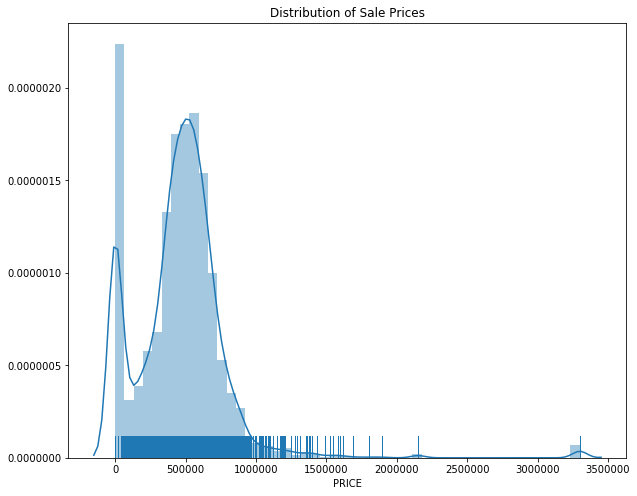

In [57]:
fig, ax = plt.subplots(figsize=(10,8))
g = sns.distplot(condo_6.PRICE, rug=True, kde=True, ax=ax)
t = g.set_title("Distribution of Sale Prices")

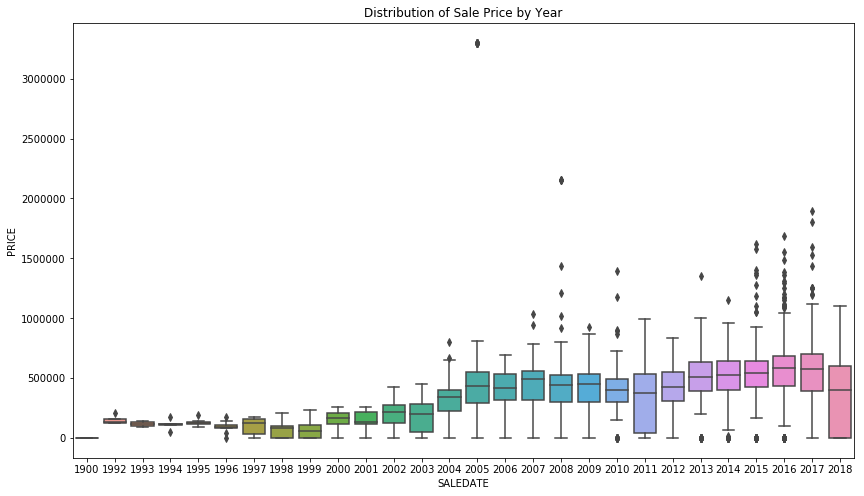

In [60]:
fig, ax = plt.subplots(figsize=(14,8))
g = sns.boxplot(y='PRICE', x=condo_6['SALEDATE'].dt.year, data=condo_6, ax=ax)
t = g.set_title("Distribution of Sale Price by Year")

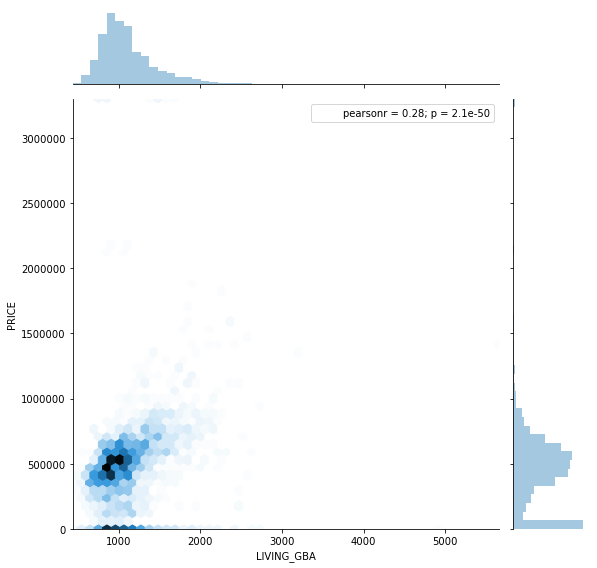

In [63]:
g = sns.jointplot(y="PRICE", x="LIVING_GBA", data=condo_6, kind="hex", size=8)

In [65]:
condo_6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2640 entries, 192 to 19562
Data columns (total 21 columns):
SSL                 2640 non-null object
BLDG_NUM            2640 non-null int64
CMPLX_NUM           2640 non-null int64
AYB                 2640 non-null int64
EYB                 2640 non-null int64
BEDRM               2640 non-null float64
BATHRM              2640 non-null float64
HF_BATHRM           2640 non-null float64
HEAT                2640 non-null float64
HEAT_D              2640 non-null object
AC                  2640 non-null object
FIREPLACES          2640 non-null float64
SALEDATE            2640 non-null datetime64[ns]
PRICE               2640 non-null float64
SALE_NUM            2640 non-null int64
LIVING_GBA          2640 non-null int64
UNIT_ID             2640 non-null int64
ADDRESS_ID          2640 non-null int64
FULLADDRESS         2640 non-null object
UNITNUM             2640 non-null object
MAR_CENSUS_TRACT    2640 non-null int64
dtypes: datetime64[ns](1

In [68]:
numerical = condo_6[list(set(condo_6.columns) - set(['SSL', 'SALEDATE', 'FULLADDRESS', 'UNITNUM']))]
numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2640 entries, 192 to 19562
Data columns (total 17 columns):
SALE_NUM            2640 non-null int64
BLDG_NUM            2640 non-null int64
MAR_CENSUS_TRACT    2640 non-null int64
FIREPLACES          2640 non-null float64
ADDRESS_ID          2640 non-null int64
EYB                 2640 non-null int64
HEAT_D              2640 non-null object
AC                  2640 non-null object
HEAT                2640 non-null float64
BATHRM              2640 non-null float64
PRICE               2640 non-null float64
LIVING_GBA          2640 non-null int64
BEDRM               2640 non-null float64
UNIT_ID             2640 non-null int64
AYB                 2640 non-null int64
CMPLX_NUM           2640 non-null int64
HF_BATHRM           2640 non-null float64
dtypes: float64(6), int64(9), object(2)
memory usage: 451.2+ KB


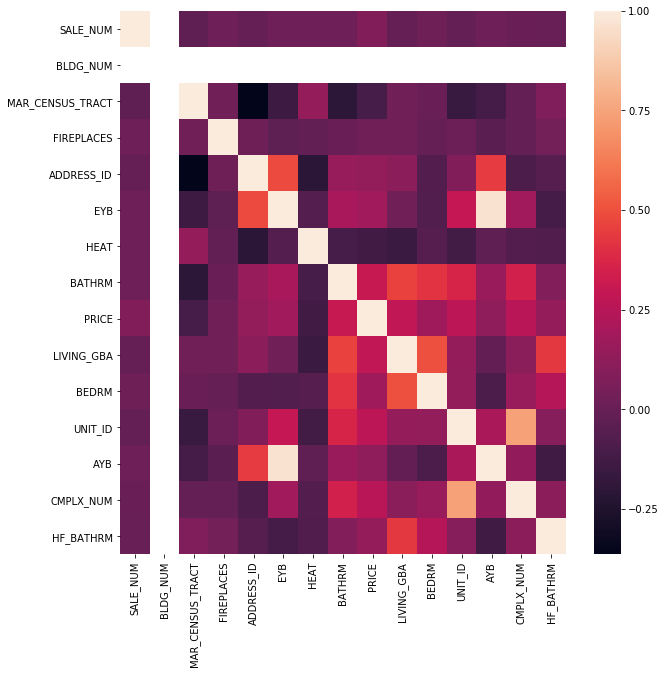

In [73]:
corr_matrix = numerical.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix, ax=ax);